In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)


fig,axs = plt.subplots(2,1)
axs[0].plot(t1, f(t1), color='tab:blue', marker='o')
axs[0].plot(t2, f(t2), color='black')
axs[1].plot(t2, np.cos(2*np.pi*t2), color='tab:orange', linestyle='--')

In [ ]:
from tools.Models import TwoLink
robot = TwoLink()
currentPose = robot.fkine(robot.q)
print(currentPose)
currentPose.t[0:2]

In [ ]:
import numpy as np
t = []
t.append([0,1])
t.append([2,3])
print(t)
t = np.array(t)
t[:,0]

In [ ]:
import numpy as np
l = [[2,3],[3,4],[4,5]]

np.array(l)

In [1]:
from tools.robots import *
from tools.dynamics import *
import sympy

n = 2
robot = SymbolicPlanarRobot(n)
model = EulerLagrange(n, robot = robot)
hi = sympy.Matrix(model.getDynamicModel())
hi

Matrix([
[-1.0*a1*g*pi_1*cos(q1) - g*pi_11*(1.0*a1*cos(q1) - 1.0*a2*sin(q1)*sin(q2) + 1.0*a2*cos(q1)*cos(q2)) - g*(pi_12*(-1.0*sin(q1)*sin(q2) + 1.0*cos(q1)*cos(q2)) + pi_13*(-1.0*sin(q1)*cos(q2) - 1.0*sin(q2)*cos(q1))) - g*(1.0*pi_2*cos(q1) - 1.0*pi_3*sin(q1)) + q_dot_1*q_dot_S_2*(1.0*a1*a2*pi_11*sin(q1)**2*sin(q2)**3 + 1.0*a1*a2*pi_11*sin(q1)**2*sin(q2)*cos(q2)**2 + 1.0*a1*a2*pi_11*sin(q2)**3*cos(q1)**2 + 1.0*a1*a2*pi_11*sin(q2)*cos(q1)**2*cos(q2)**2 + 1.0*a1*pi_12*sin(q1)**2*sin(q2) + 1.0*a1*pi_12*sin(q2)*cos(q1)**2 + 1.0*a1*pi_13*sin(q1)**2*cos(q2) + 1.0*a1*pi_13*cos(q1)**2*cos(q2)) + q_dot_2*q_dot_S_1*(-1.0*a1*a2*pi_11*sin(q1)**2*sin(q2)**3 - 1.0*a1*a2*pi_11*sin(q1)**2*sin(q2)*cos(q2)**2 - 1.0*a1*a2*pi_11*sin(q2)**3*cos(q1)**2 - 1.0*a1*a2*pi_11*sin(q2)*cos(q1)**2*cos(q2)**2 - 1.0*a1*pi_12*sin(q1)**2*sin(q2) - 1.0*a1*pi_12*sin(q2)*cos(q1)**2 - 1.0*a1*pi_13*sin(q1)**2*cos(q2) - 1.0*a1*pi_13*cos(q1)**2*cos(q2)) + q_dot_dot_1*(1.0*a1**2*pi_1*sin(q1)**4 + 2.0*a1**2*pi_1*sin(q1)**2*cos(

In [4]:
q = [0,1]
qd = [0,1]
qdd = [0,1]
Yeval = model.evaluateY(q,qd,qd,qdd)

sympy.Matrix(Yeval)

Matrix([
[-1.0*a1*g, -1.0*g, 0, 0, 0, 0, 0, 0, 0, 0, 1.0*a1*a2*cos(1)**3 + 1.0*a1*a2*sin(1)**2*cos(1) + 1.0*a2**2*cos(1)**4 + 2.0*a2**2*sin(1)**2*cos(1)**2 + 1.0*a2**2*sin(1)**4 - g*(1.0*a1 + 1.0*a2*cos(1)), 1.0*a1*cos(1) + 2.0*a2*cos(1)**2 + 2.0*a2*sin(1)**2 - 1.0*g*cos(1), -1.0*a1*sin(1) + 1.0*g*sin(1), 0, 0, 0, 0, 0, 0, 1.0],
[        0,      0, 0, 0, 0, 0, 0, 0, 0, 0,                                                               1.0*a2**2*cos(1)**4 + 2.0*a2**2*sin(1)**2*cos(1)**2 + 1.0*a2**2*sin(1)**4 - 1.0*a2*g*cos(1),                 2.0*a2*cos(1)**2 + 2.0*a2*sin(1)**2 - 1.0*g*cos(1),                  1.0*g*sin(1), 0, 0, 0, 0, 0, 0, 1.0]])

In [ ]:
pi = sym.symbol(f"pi_(1:{10*n+1})")
symM = sympy.Matrix(model.M)

# dynamic parameters
m = sym.symbol(f"m(1:{n+1})")  # link masses
dc = sym.symbol(f"dc(1:{n+1})")
Ixx = sym.symbol(f"Ixx(1:{n+1})")
Iyy = sym.symbol(f"Iyy(1:{n+1})")
Izz = sym.symbol(f"Izz(1:{n+1})")

# dynamic parameters

for i in range(n):
    shift = i*10

    symM = symM.subs(dc[i]*m[i], pi[shift+1])

    symM = symM.subs(m[i], pi[shift])

    symM = symM.subs(Ixx[i], pi[shift+4])
    symM = symM.subs(Iyy[i], pi[shift+7])
    symM = symM.subs(Izz[i], pi[shift+9])

symM

In [6]:
model.getY()
#sympy.Matrix([symModel[0]]).jacobian(pi)
#sympy.Matrix(model.getDynamicModel())


Matrix([
[-1.0*a1*g*cos(q1) + q_dot_dot_1*(1.0*a1**2*sin(q1)**4 + 2.0*a1**2*sin(q1)**2*cos(q1)**2 + 1.0*a1**2*cos(q1)**4), -1.0*g*cos(q1) + q_dot_dot_1*(2.0*a1*sin(q1)**2 + 2.0*a1*cos(q1)**2), 1.0*g*sin(q1), 0, 0, 0, 0, 0, 0, 1.0*q_dot_dot_1, -g*(1.0*a1*cos(q1) - 1.0*a2*sin(q1)*sin(q2) + 1.0*a2*cos(q1)*cos(q2)) + q_dot_1*q_dot_2*(-1.0*a1*a2*sin(q1)**2*sin(q2)**3 - 1.0*a1*a2*sin(q1)**2*sin(q2)*cos(q2)**2 - 1.0*a1*a2*sin(q2)**3*cos(q1)**2 - 1.0*a1*a2*sin(q2)*cos(q1)**2*cos(q2)**2) + q_dot_2*(q_dot_1*(-1.0*a1*a2*sin(q1)**2*sin(q2)**3 - 1.0*a1*a2*sin(q1)**2*sin(q2)*cos(q2)**2 - 1.0*a1*a2*sin(q2)**3*cos(q1)**2 - 1.0*a1*a2*sin(q2)*cos(q1)**2*cos(q2)**2) + q_dot_2*(-1.0*a1*a2*sin(q1)**2*sin(q2)**3 - 1.0*a1*a2*sin(q1)**2*sin(q2)*cos(q2)**2 - 1.0*a1*a2*sin(q2)**3*cos(q1)**2 - 1.0*a1*a2*sin(q2)*cos(q1)**2*cos(q2)**2)) + q_dot_dot_1*(1.0*a1**2*sin(q1)**4*sin(q2)**2 + 1.0*a1**2*sin(q1)**4*cos(q2)**2 + 2.0*a1**2*sin(q1)**2*sin(q2)**2*cos(q1)**2 + 2.0*a1**2*sin(q1)**2*cos(q1)**2*cos(q2)**2 + 1.0*a1*

In [ ]:
pi = sym.symbol(f"pi_(1:{10*n+1})")

# dynamic parameters
m = sym.symbol(f"m(1:{n+1})")  # link masses
dc = sym.symbol(f"dc(1:{n+1})")
Ixx = sym.symbol(f"Ixx(1:{n+1})")
Iyy = sym.symbol(f"Iyy(1:{n+1})")
Izz = sym.symbol(f"Izz(1:{n+1})")

# dynamic parameters

for i in range(n):
    shift = i*10

    irci = model.rc[:,i]
    Ici = np.diag([Ixx[i],Iyy[i],Izz[i]])

    sk_irci = np.array([[0, -irci[2], irci[1]], 
                     [irci[2], 0, -irci[0]], 
                     [-irci[1], irci[0], 0]])
    
    I = Ici + m[i]*sk_irci.T@sk_irci

    symModel = symModel.subs(I[0,0], pi[shift+4])
    symModel = symModel.subs(I[1,1], pi[shift+7])
    symModel = symModel.subs(I[2,2], pi[shift+9])

    symModel = symModel.subs(irci[0]*m[i], pi[shift+1])

    symModel = symModel.subs(m[i], pi[shift])
symModel

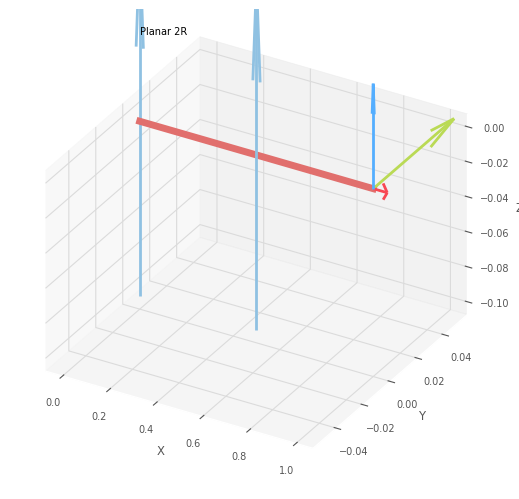

In [1]:
from tools.robots import *
from tools.dynamics import *
from control.adaptive_control import *
import sympy

n = 2
symbolic_robot = SymbolicPlanarRobot(n)
model = EulerLagrange(n, robot = symbolic_robot)
robot = TwoLink()
env = PyPlot()
loop = AdaptiveControl(robot, env, model)